In [1]:
import numpy as np
import pandas as pd

## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# do this to make Pandas show all the columns of a DataFrame, otherwise it just shows a summary
pd.set_option('display.max_columns', None) 

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
#%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [2]:
# Modelling Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

# Modelling Helpers
from sklearn.feature_selection import RFECV

from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing.data import QuantileTransformer

from sklearn.pipeline import Pipeline

In [3]:
#load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
display(train.shape)
display(train.head())

(9557, 143)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
display(test.shape)
display(test.head())

(23856, 142)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [6]:
train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.1

In [7]:
test.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,6.453000e+03,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,5730.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,4203.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000
mean,1.748726e+05,0.050679,4.955776,0.028421,0.992748,0.961603,0.240191,1.348517,0.416541,1.563967,1.980508,0.389168,1.656522,2.045691,0.805709,3.220490,4.026199,4.021756,4.140426,7.214914,0.425172,4.021756,0.588741,0.077171,0.201375,0.008300,0.107017,0.014462,0.001677,0.001258,0.692740,0.234029,0.001761,0.000126,0.013456,0.057889,0.971538,0.018989,0.002138,0.001425,0.669559,0.962274,0.032487,0.005240,0.879527,0.000503,0.003856,0.114940,0.003647,0.225394,0.753060,0.016055,0.001844,0.002222,0.476861,0.476903,0.044014,0.875419,0.034708,0.086058,0.001677,0.000168,0.001970,0.111460,0.322938,0.565602,0.127222,0.307596,0.565183,0.102490,0.270540,0.62697,0.056757,0.490401,0.509599,0.137827,0.123198,0.273265,0.035924,0.058811,0.033409,0.337567,0.307428,0.187500,0.384809,0.013665,0.008426,0.049212,0.009809,0.003228,0.012617,0.002767,0.012701,0.007839,1.412559,2.609197,0.295146,4.0

In [8]:
print([x for x in train.columns if train[x].dtype=='O'])
print([x for x in test.columns if test[x].dtype=='O'])

print('\n')
print([x for x in train.columns if train[x].dtype=='float'])
print([x for x in test.columns if test[x].dtype=='float'])

print('\n')
print([x for x in train.columns if train[x].dtype=='int64'])
print([x for x in test.columns if test[x].dtype=='int64'])

['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa']
['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa']


['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned']
['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned']


['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'hhsize', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'e

In [9]:
# Count the null columns of train set
print('Train Set Null Counts')
null_columns=train.columns[train.isnull().any()]
display(train[null_columns].isnull().sum())

# Count the null columns of test set
print('Test Set Null Counts')
null_columns=test.columns[test.isnull().any()]
display(test[null_columns].isnull().sum())

Train Set Null Counts


v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

Test Set Null Counts


v2a1         17403
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

In [10]:
# Count the null columns
null_columns=test.columns[test.isnull().any()]
display(test[null_columns].isnull().sum())

v2a1         17403
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

In [11]:
print('Non Null Count of "v2a1" = {}' .format(train.v2a1.notnull().sum()))
print('Null Count of "v2a1" = {}' .format(train.v2a1.isnull().sum()))

print('\n')
print(train[(train.tipovivi2==1) |(train.tipovivi3==1)].shape)
print(train[(train.tipovivi2==1) |(train.tipovivi3==1)].v2a1.isnull().sum())

print('\n')
print(train[(train.tipovivi1==1) |(train.tipovivi4==1) | (train.tipovivi5==1)].shape)
print(train[(train.tipovivi1==1) |(train.tipovivi4==1) | (train.tipovivi5==1)].v2a1.isnull().sum())

# Conclusion: 
# Household staying in rented house or own house with paying installments are paying the rent.
# Household staying in own house or precarious/assigned/borrowed house are not paying any rent.
# All null values will be filled with zeros.

Non Null Count of "v2a1" = 2697
Null Count of "v2a1" = 6860


(2697, 143)
0


(6860, 143)
6860


In [12]:
print('Non Null Count of "v2a1" = {}' .format(test.v2a1.notnull().sum()))
print('Null Count of "v2a1" = {}' .format(test.v2a1.isnull().sum()))

print('\n')
print(test[(test.tipovivi2==1) |(test.tipovivi3==1)].shape)
print(test[(test.tipovivi2==1) |(test.tipovivi3==1)].v2a1.isnull().sum())

print('\n')
print(test[(test.tipovivi1==1) |(test.tipovivi4==1) | (test.tipovivi5==1)].shape)
print(test[(test.tipovivi1==1) |(test.tipovivi4==1) | (test.tipovivi5==1)].v2a1.isnull().sum())

# Conclusion: 
# Household staying in rented house or own house with paying installments are paying the rent.
# Household staying in own house or precarious/assigned/borrowed house are not paying any rent.
# All null values will be filled with zeros.

Non Null Count of "v2a1" = 6453
Null Count of "v2a1" = 17403


(6453, 142)
0


(17403, 142)
17403


In [13]:
# impute missing values of 'v2a1'
train.v2a1.fillna(0, inplace=True)
test.v2a1.fillna(0, inplace=True)

# Count the null columns of train set
print('Train Set Null Counts')
null_columns=train.columns[train.isnull().any()]
display(train[null_columns].isnull().sum())

# Count the null columns of test set
print('Test Set Null Counts')
null_columns=test.columns[test.isnull().any()]
display(test[null_columns].isnull().sum())

Train Set Null Counts


v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

Test Set Null Counts


v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

In [14]:
print('Non Null Count of "v18q1" = {}' .format(train.v18q1.notnull().sum()))
print('Null Count of "v18q1" = {}' .format(train.v18q1.isnull().sum()))

print('\n')
print('Non Zero Count of "v18q" = {}' .format(train[(train['v18q']==1)].v18q.count()))
print('Zero Count of "v18q" = {}' .format(train[(train['v18q']==0)].v18q.count()))

# Conclusion: 
# The variable "v18q1" is null if the household does not own any tablet.
# All null values will be filled with zeros.

Non Null Count of "v18q1" = 2215
Null Count of "v18q1" = 7342


Non Zero Count of "v18q" = 2215
Zero Count of "v18q" = 7342


In [15]:
print('Non Null Count of "v18q1" = {}' .format(test.v18q1.notnull().sum()))
print('Null Count of "v18q1" = {}' .format(test.v18q1.isnull().sum()))

print('\n')
print('Non Zero Count of "v18q" = {}' .format(test[(test['v18q']==1)].v18q.count()))
print('Zero Count of "v18q" = {}' .format(test[(test['v18q']==0)].v18q.count()))

# Conclusion: 
# The variable "v18q1" is null if the household does not own any tablet.
# All null values will be filled with zeros.

Non Null Count of "v18q1" = 5730
Null Count of "v18q1" = 18126


Non Zero Count of "v18q" = 5730
Zero Count of "v18q" = 18126


In [16]:
# impute missing values of 'v18q1'
train.v18q1.fillna(0, inplace=True)
test.v18q1.fillna(0, inplace=True)

# Count the null columns of train set
print('Train Set Null Counts')
null_columns=train.columns[train.isnull().any()]
display(train[null_columns].isnull().sum())

# Count the null columns of test set
print('Test Set Null Counts')
null_columns=test.columns[test.isnull().any()]
display(test[null_columns].isnull().sum())

Train Set Null Counts


rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

Test Set Null Counts


rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

In [17]:
print(train['rez_esc'].unique())
print(test['rez_esc'].unique())

[nan  1.  0.  3.  2.  4.  5.]
[nan  0.  3.  2.  1.  4.  5. 99.]


In [18]:
print("Training Set:")
print('Non Null Count of "rez_esc" = {}' .format(train.rez_esc.notnull().sum()))
print('Null Count of "rez_esc" = {}' .format(train.rez_esc.isnull().sum()))

print('\n')
print('Max Age = {}' .format(train[train['rez_esc'].notnull()][['age', 'escolari', 'rez_esc']].age.max()))
print('Min Age = {}' .format(train[train['rez_esc'].notnull()][['age', 'escolari', 'rez_esc']].age.min()))

print('\n')
print("Testing Set:")
print('Non Null Count of "rez_esc" = {}' .format(test.rez_esc.notnull().sum()))
print('Null Count of "rez_esc" = {}' .format(test.rez_esc.isnull().sum()))

print('\n')
print('Max Age = {}' .format(test[test['rez_esc'].notnull()][['age', 'escolari', 'rez_esc']].age.max()))
print('Min Age = {}' .format(test[test['rez_esc'].notnull()][['age', 'escolari', 'rez_esc']].age.min()))

# Observation:
# The variable "rez_esc" is non null for age between 7 to 17 years

Training Set:
Non Null Count of "rez_esc" = 1629
Null Count of "rez_esc" = 7928


Max Age = 17
Min Age = 7


Testing Set:
Non Null Count of "rez_esc" = 4203
Null Count of "rez_esc" = 19653


Max Age = 17
Min Age = 7


In [19]:
train[train['rez_esc'].notnull()][['age', 'escolari', 'rez_esc']]

# Observation:
# Looking at the data, ideal age to start schooling is 7 years & ideal age to finish schooling is 17 years
# So someone 15 years ("age") old should complete 8 years ("escolari") of schooling (15-7)
# Thus Years behind in school ("rez_esc") = "age" - 7 - "escolari"
# The variable "rez_esc" is positive if someone is behind in school, otherwise zero
# For non-schooling age ("age"<7 & "age">17), "rez_esc" is not calculated and thus it is null

,age,escolari,rez_esc
3,17,9,1.0
6,8,2,0.0
7,7,0,0.0
10,11,3,1.0
38,15,8,0.0
42,15,8,0.0
48,8,2,0.0
50,8,2,0.0
52,14,8,0.0
54,13,6,0.0


In [20]:
# Validating the observation for the variable "rez_esc"
train['rez_esc_calculated'] = train.age - train.escolari - 7
train.rez_esc_calculated[train['rez_esc_calculated']<0] = 0
train.rez_esc_calculated[train['age']<7]= np.nan
train.rez_esc_calculated[train['age']>17]= np.nan

# Count the null columns of train set
print('Train Set Null Counts')
null_columns=train.columns[train.isnull().any()]
display(train[null_columns].isnull().sum())

test['rez_esc_calculated'] = test.age - test.escolari - 7
test.rez_esc_calculated[test['rez_esc_calculated']<0] = 0
test.rez_esc_calculated[test['age']<7]= np.nan

# Count the null columns of test set
print('Test Set Null Counts')
null_columns=test.columns[test.isnull().any()]
display(test[null_columns].isnull().sum())

# There is an extra null value in "res_esc" in both training & testing set

Train Set Null Counts


rez_esc               7928
meaneduc                 5
SQBmeaned                5
rez_esc_calculated    7927
dtype: int64

Test Set Null Counts


rez_esc               19653
meaneduc                 31
SQBmeaned                31
rez_esc_calculated     2178
dtype: int64

In [21]:
# Validating the observation for the variable "rez_esc"
print("Training Set:")
train['rez_esc_bol'] = (train['rez_esc'] == train['rez_esc_calculated'])
display(train[(train['rez_esc_bol']==False) & (train['rez_esc_calculated'].notnull())][['age', 'escolari', 'rez_esc', 'rez_esc_calculated', 'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9']])

print("Testing Set:")
test['rez_esc_bol'] = (test['rez_esc'] == test['rez_esc_calculated'])
display(test[(test['rez_esc_bol']==False) & (test['rez_esc_calculated'].notnull())][['age', 'escolari', 'rez_esc', 'rez_esc_calculated', 'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9']])


# The calculated value of "rez_esc" do not match for the following rows.
# Looking the data, it is observed the calculated values are correct.
# All null values will be filled with zeros.

Training Set:


,age,escolari,rez_esc,rez_esc_calculated,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
1454,16,0,5.0,9.0,1,0,0,0,0,0,0,0,0
2514,10,0,NaN,3.0,1,0,0,0,0,0,0,0,0
7754,16,0,5.0,9.0,1,0,0,0,0,0,0,0,0
7755,15,2,5.0,6.0,0,1,0,0,0,0,0,0,0
8646,16,3,5.0,6.0,0,1,0,0,0,0,0,0,0
9098,16,1,5.0,8.0,0,1,0,0,0,0,0,0,0


Testing Set:


,age,escolari,rez_esc,rez_esc_calculated,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
1,41,16,NaN,18.0,0,0,0,0,0,0,0,1,0
2,41,17,NaN,17.0,0,0,0,0,0,0,0,0,1
3,59,16,NaN,36.0,0,0,0,0,0,0,0,1,0
4,18,11,NaN,0.0,0,0,0,0,1,0,0,0,0
5,38,16,NaN,15.0,0,0,0,0,0,0,0,1,0
6,42,11,NaN,24.0,0,0,0,0,1,0,0,0,0
7,21,14,NaN,0.0,0,0,0,0,0,0,0,1,0
8,22,14,NaN,1.0,0,0,0,0,0,0,0,1,0
9,70,10,NaN,53.0,0,0,0,1,0,0,0,0,0
10,18,10,NaN,1.0,0,0,0,1,0,0,0,0,0


In [22]:
# impute missing values of "rez_esc"
train = train.drop(['rez_esc_calculated','rez_esc_bol'],1)
test = test.drop(['rez_esc_calculated','rez_esc_bol'],1)

train['rez_esc'] = train.age - train.escolari - 7
train.rez_esc[train['rez_esc']<0] = 0
train.rez_esc[train['age']<7]= 0
train.rez_esc[train['age']>17]= 0

test['rez_esc'] = test.age - test.escolari - 7
test.rez_esc[test['rez_esc']<0] = 0
test.rez_esc[test['age']<7]= 0
test.rez_esc[test['age']>17]= 0

# Count the null columns of train set
print('Train Set Null Counts')
null_columns=train.columns[train.isnull().any()]
display(train[null_columns].isnull().sum())

# Count the null columns of test set
print('Test Set Null Counts')
null_columns=test.columns[test.isnull().any()]
display(test[null_columns].isnull().sum())

Train Set Null Counts


meaneduc     5
SQBmeaned    5
dtype: int64

Test Set Null Counts


meaneduc     31
SQBmeaned    31
dtype: int64

In [23]:
print("Training Set:")
display(train[train["meaneduc"].isnull()][['idhogar','age','escolari','meaneduc','hogar_adul','hogar_nin','hogar_mayor','hogar_total','parentesco1']])

print("Testing Set:")
display(test[test["meaneduc"].isnull()][['idhogar','age','escolari','meaneduc','hogar_adul','hogar_nin','hogar_mayor','hogar_total','parentesco1']])

Training Set:


,idhogar,age,escolari,meaneduc,hogar_adul,hogar_nin,hogar_mayor,hogar_total,parentesco1
1291,1b31fd159,18,10,NaN,0,1,0,1,1
1840,a874b7ce7,18,6,NaN,0,2,0,2,0
1841,a874b7ce7,18,4,NaN,0,2,0,2,1
2049,faaebf71a,19,12,NaN,0,2,0,2,1
2050,faaebf71a,19,12,NaN,0,2,0,2,0


Testing Set:


,idhogar,age,escolari,meaneduc,hogar_adul,hogar_nin,hogar_mayor,hogar_total,parentesco1
4,1e2fc704e,18,11,NaN,0,1,0,1,1
535,bb7038e41,18,11,NaN,0,1,0,1,1
536,4937daf94,19,12,NaN,0,2,0,2,0
537,4937daf94,19,12,NaN,0,2,0,2,1
2612,4deb0c65e,19,8,NaN,0,2,0,2,1
2613,4deb0c65e,17,6,NaN,0,2,0,2,0
6809,74718009d,18,12,NaN,0,2,0,2,0
6810,74718009d,19,12,NaN,0,2,0,2,1
7266,8e4c4b74b,19,12,NaN,0,2,0,2,1
7267,8e4c4b74b,18,10,NaN,0,2,0,2,0


In [24]:
print("Training Set:")
display(train[train["hogar_adul"]==0][['idhogar','age','escolari','meaneduc','hogar_adul','hogar_nin','hogar_mayor','hogar_total','parentesco1']])

print("Testing Set:")
display(test[test["hogar_adul"]==0][['idhogar','age','escolari','meaneduc','hogar_adul','hogar_nin','hogar_mayor','hogar_total','parentesco1']])

# Observation:
# The variable "meaneduc" is null for households with no adults ("hogar_adul"=0)
# All null values will be filled with zeros.

Training Set:


,idhogar,age,escolari,meaneduc,hogar_adul,hogar_nin,hogar_mayor,hogar_total,parentesco1
1291,1b31fd159,18,10,NaN,0,1,0,1,1
1840,a874b7ce7,18,6,NaN,0,2,0,2,0
1841,a874b7ce7,18,4,NaN,0,2,0,2,1
2049,faaebf71a,19,12,NaN,0,2,0,2,1
2050,faaebf71a,19,12,NaN,0,2,0,2,0


Testing Set:


,idhogar,age,escolari,meaneduc,hogar_adul,hogar_nin,hogar_mayor,hogar_total,parentesco1
4,1e2fc704e,18,11,NaN,0,1,0,1,1
535,bb7038e41,18,11,NaN,0,1,0,1,1
536,4937daf94,19,12,NaN,0,2,0,2,0
537,4937daf94,19,12,NaN,0,2,0,2,1
2612,4deb0c65e,19,8,NaN,0,2,0,2,1
2613,4deb0c65e,17,6,NaN,0,2,0,2,0
6809,74718009d,18,12,NaN,0,2,0,2,0
6810,74718009d,19,12,NaN,0,2,0,2,1
7266,8e4c4b74b,19,12,NaN,0,2,0,2,1
7267,8e4c4b74b,18,10,NaN,0,2,0,2,0


In [25]:
# impute missing values of "meaneduc" & "SQBmeaned"
train.meaneduc.fillna(0, inplace=True)
train.SQBmeaned.fillna(0, inplace=True)

test.meaneduc.fillna(0, inplace=True)
test.SQBmeaned.fillna(0, inplace=True)

# Count the null columns of train set
print('Train Set Null Counts')
null_columns=train.columns[train.isnull().any()]
display(train[null_columns].isnull().sum())

# Count the null columns of test set
print('Test Set Null Counts')
null_columns=test.columns[test.isnull().any()]
display(test[null_columns].isnull().sum())

Train Set Null Counts


Series([], dtype: float64)

Test Set Null Counts


Series([], dtype: float64)

In [26]:
# The variable "dependency" has lot of "yes" and "no" values
train['dependency_calculated'] = (train.hogar_nin + train.hogar_mayor)/(train.hogar_adul - train.hogar_mayor)
test['dependency_calculated'] = (test.hogar_nin + test.hogar_mayor)/(test.hogar_adul - test.hogar_mayor)

print("Unique values in Training Set:")
print(train['dependency'].unique())

print("\nUnique values in Testing Set:")
print(test['dependency'].unique())

print("\nTraining Set:")
print(train[(train['dependency']=='yes') | (train['dependency']=='no')][['dependency']].count())
print(train[(train['dependency_calculated']==1) | (train['dependency_calculated']==0)][['dependency_calculated']].count())

print("\nTesting Set:")
print(test[(test['dependency']=='yes') | (test['dependency']=='no')][['dependency']].count())
print(test[(test['dependency_calculated']==1) | (test['dependency_calculated']==0)][['dependency_calculated']].count())

# Obsevation:
# All "yes" should be '1' and "no" should be '0'

Unique values in Training Set:
['no' '8' 'yes' '3' '.5' '.25' '2' '.66666669' '.33333334' '1.5'
 '.40000001' '.75' '1.25' '.2' '2.5' '1.2' '4' '1.3333334' '2.25'
 '.22222222' '5' '.83333331' '.80000001' '6' '3.5' '1.6666666' '.2857143'
 '1.75' '.71428573' '.16666667' '.60000002']

Unique values in Testing Set:
['.5' 'no' '8' 'yes' '.25' '2' '.33333334' '.375' '.60000002' '1.5' '.2'
 '.75' '.66666669' '3' '.14285715' '.40000001' '.80000001' '1.6666666'
 '.2857143' '1.25' '2.5' '5' '.85714287' '1.3333334' '.16666667' '4'
 '.125' '.83333331' '2.3333333' '7' '1.2' '3.5' '2.25' '3.3333333' '6']

Training Set:
dependency    3939
dtype: int64
dependency_calculated    3939
dtype: int64

Testing Set:
dependency    9677
dtype: int64
dependency_calculated    9677
dtype: int64


In [27]:
# The variables "edjefe" and "edjefa" have lot of "yes" and "no" values
display(train[['idhogar','edjefe','edjefa','escolari','male','parentesco1']][:20])
display(test[['idhogar','edjefe','edjefa','escolari','male','parentesco1']][:20])

# Obsevation:
# "edjefe" for a household = "escolari" x "male" x "parentesco1"
# "edjefa" for a household = "escolari" x "female" x "parentesco1"
# All "yes" should be '1' and "no" should be '0'

,idhogar,edjefe,edjefa,escolari,male,parentesco1
0,21eb7fcc1,10,no,10,1,1
1,0e5d7a658,12,no,12,1,1
2,2c7317ea8,no,11,11,0,1
3,2b58d945f,11,no,9,1,0
4,2b58d945f,11,no,11,0,0
5,2b58d945f,11,no,11,1,1
6,2b58d945f,11,no,2,0,0
7,d6dae86b7,9,no,0,0,0
8,d6dae86b7,9,no,9,1,1
9,d6dae86b7,9,no,11,0,0


,idhogar,edjefe,edjefa,escolari,male,parentesco1
0,72958b30c,no,17,0,1,0
1,72958b30c,no,17,16,1,0
2,72958b30c,no,17,17,0,1
3,5b598fbc9,16,no,16,1,1
4,1e2fc704e,no,11,11,0,1
5,8ee7365a8,no,11,16,0,0
6,8ee7365a8,no,11,11,0,1
7,ff69a6fc8,no,14,14,0,0
8,ff69a6fc8,no,14,14,0,1
9,b61e2bb92,no,10,10,0,1


In [28]:
train.dependency.replace('no','0',inplace=True)
train.dependency.replace('yes','1',inplace=True)
train.dependency = train.dependency.astype('float')

test.dependency.replace('no','0',inplace=True)
test.dependency.replace('yes','1',inplace=True)
test.dependency = test.dependency.astype('float')

train.edjefe.replace('no','0',inplace=True)
train.edjefe.replace('yes','1',inplace=True)
train.edjefe = train.edjefe.astype('float')

test.edjefe.replace('no','0',inplace=True)
test.edjefe.replace('yes','1',inplace=True)
test.edjefe = test.edjefe.astype('float')

train.edjefa.replace('no','0',inplace=True)
train.edjefa.replace('yes','1',inplace=True)
train.edjefa = train.edjefa.astype('float')

test.edjefa.replace('no','0',inplace=True)
test.edjefa.replace('yes','1',inplace=True)
test.edjefa = test.edjefa.astype('float')

train = train.drop(['dependency_calculated'],1)
test = test.drop(['dependency_calculated'],1)

display(train[['idhogar','edjefe','escolari','male','parentesco1']][:20])
display(test[['idhogar','edjefe','escolari','male','parentesco1']][:20])

,idhogar,edjefe,escolari,male,parentesco1
0,21eb7fcc1,10.0,10,1,1
1,0e5d7a658,12.0,12,1,1
2,2c7317ea8,0.0,11,0,1
3,2b58d945f,11.0,9,1,0
4,2b58d945f,11.0,11,0,0
5,2b58d945f,11.0,11,1,1
6,2b58d945f,11.0,2,0,0
7,d6dae86b7,9.0,0,0,0
8,d6dae86b7,9.0,9,1,1
9,d6dae86b7,9.0,11,0,0


,idhogar,edjefe,escolari,male,parentesco1
0,72958b30c,0.0,0,1,0
1,72958b30c,0.0,16,1,0
2,72958b30c,0.0,17,0,1
3,5b598fbc9,16.0,16,1,1
4,1e2fc704e,0.0,11,0,1
5,8ee7365a8,0.0,16,0,0
6,8ee7365a8,0.0,11,0,1
7,ff69a6fc8,0.0,14,0,0
8,ff69a6fc8,0.0,14,0,1
9,b61e2bb92,0.0,10,0,1


In [29]:
household_id = pd.unique(train.idhogar)
display(household_id)
display(len(household_id))

array(['21eb7fcc1', '0e5d7a658', '2c7317ea8', ..., 'a8eeafc29',
       '212db6f6c', 'd6c086aa3'], dtype=object)

2988

In [30]:
# Checking if all members of same household have same Target
hh = []
for id in pd.unique(train.idhogar):
    train_hh = train[train['idhogar']==id]
    train_pp = train_hh[train_hh['parentesco1']==1]
    if not train_pp.empty:
        for j in range(0,len(train_hh)):
            if train_hh.Target.iloc[j] != train_pp.Target.iloc[0]:
                hh.append(id)

hh = pd.unique(hh)       
display(train[train['idhogar'].isin(hh)][['idhogar', 'Target', 'parentesco1']])
print(len(hh))

,idhogar,Target,parentesco1
282,4b6077882,1,1
283,4b6077882,2,0
284,4b6077882,2,0
285,6833ac5dc,2,0
286,6833ac5dc,2,0
287,6833ac5dc,2,0
288,6833ac5dc,2,1
289,6833ac5dc,2,0
290,6833ac5dc,1,0
318,43b9c83e5,2,0


85


In [31]:
# Correcting the Target of all members of same household to have same Target
for i in hh:
    train.loc[train['idhogar']==i, 'Target'] = train[(train['idhogar']==i) & (train['parentesco1']==1)].Target.iloc[0]  

display(train[train['idhogar'].isin(hh)][['idhogar', 'Target', 'parentesco1']])

hh = []
for i in range(0,len(household_id)):
    id = household_id[i]
    train_hh = train[train['idhogar']==id]
    train_pp = train_hh[train_hh['parentesco1']==1]
    if not train_pp.empty:
        for j in range(0,len(train_hh)):
            if train_hh.Target.iloc[j] != train_pp.Target.iloc[0]:
                hh.append(id)
                
hh = pd.unique(hh)       
display(train[train['idhogar'].isin(hh)][['idhogar', 'Target', 'parentesco1']])
print(len(hh))

,idhogar,Target,parentesco1
282,4b6077882,1,1
283,4b6077882,1,0
284,4b6077882,1,0
285,6833ac5dc,2,0
286,6833ac5dc,2,0
287,6833ac5dc,2,0
288,6833ac5dc,2,1
289,6833ac5dc,2,0
290,6833ac5dc,2,0
318,43b9c83e5,2,0


,idhogar,Target,parentesco1


0


In [32]:
train_id = train.Id
test_id = test.Id

train = train.drop(['Id'],1)
test = test.drop(['Id'],1)

y = train.Target
X = train.drop(['Target'],1)

full = train.append(test, ignore_index = True)

target = {1:'Extereme Poverty', 2:'Moderate Poverty', 3: 'Vulnerable Households', 4:'Non Vulnerable Households'}

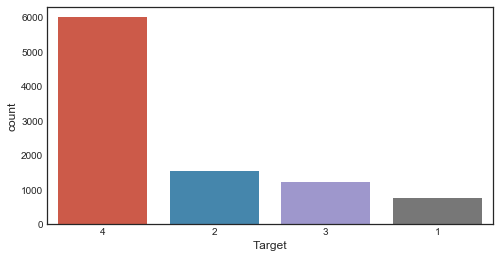

In [33]:
plt.figure(figsize=(8,4)) 
sns.countplot(data=train, x=train['Target'], order=train['Target'].value_counts().index)

Text(0,0.5,'Mobile Phone')

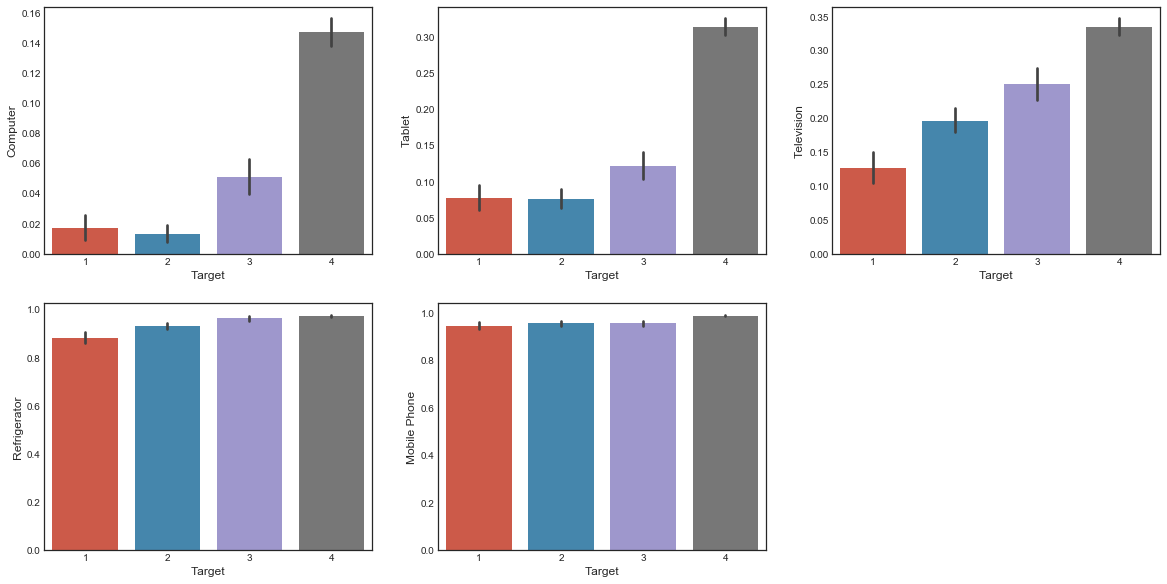

In [34]:
plt.figure(figsize=(20,10)) 
plt.subplot(2, 3, 1)
sns.barplot(x='Target' , y='computer', data=train)
plt.ylabel("Computer")
plt.subplot(2, 3, 2)
sns.barplot(x='Target' , y='v18q', data=train)
plt.ylabel("Tablet")
plt.subplot(2, 3, 3)
sns.barplot(x='Target' , y='television', data=train)
plt.ylabel("Television")
plt.subplot(2, 3, 4)
sns.barplot(x='Target' , y='refrig', data=train)
plt.ylabel("Refrigerator")
plt.subplot(2, 3, 5)
sns.barplot(x='Target' , y='mobilephone', data=train)
plt.ylabel("Mobile Phone")

Text(0,0.5,'Hueter Norte')

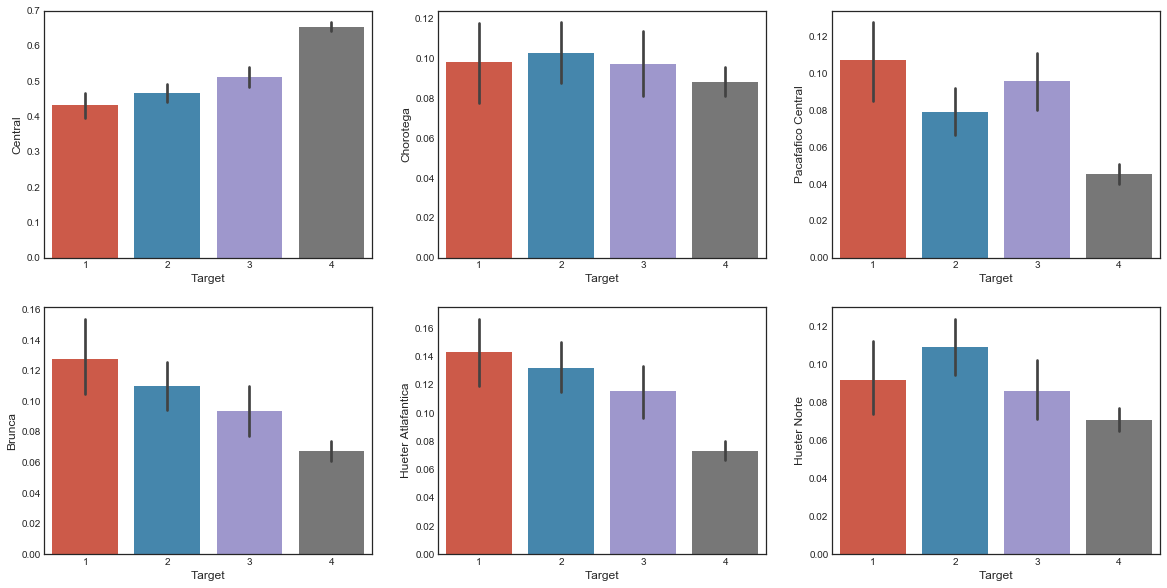

In [35]:
plt.figure(figsize=(20,10)) 
plt.subplot(2, 3, 1)
sns.barplot(x='Target' , y='lugar1', data=train)
plt.ylabel("Central")
plt.subplot(2, 3, 2)
sns.barplot(x='Target' , y='lugar2', data=train)
plt.ylabel("Chorotega")
plt.subplot(2, 3, 3)
sns.barplot(x='Target' , y='lugar3', data=train)
plt.ylabel("Pacafafico Central")
plt.subplot(2, 3, 4)
sns.barplot(x='Target' , y='lugar4', data=train)
plt.ylabel("Brunca")
plt.subplot(2, 3, 5)
sns.barplot(x='Target' , y='lugar5', data=train)
plt.ylabel("Hueter Atlafantica")
plt.subplot(2, 3, 6)
sns.barplot(x='Target' , y='lugar6', data=train)
plt.ylabel("Hueter Norte")

-1.0

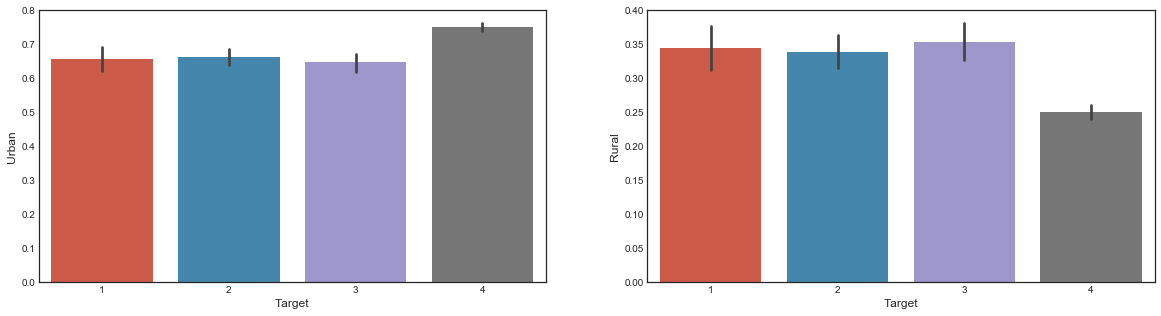

In [36]:
plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.barplot(x='Target' , y='area1', data=train)
plt.ylabel("Urban")
plt.subplot(1, 2, 2)
sns.barplot(x='Target' , y='area2', data=train)
plt.ylabel("Rural")

train['area1'].corr(train['area2'])

-0.9999999999999999

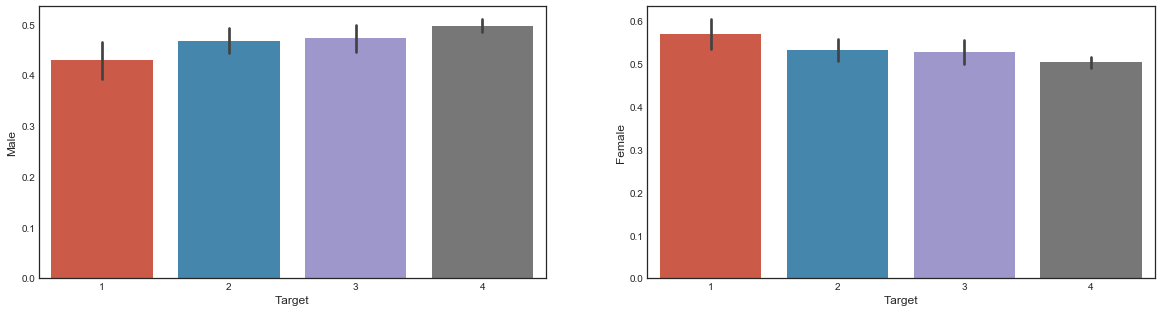

In [37]:
plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.barplot(x='Target' , y='male', data=train)
plt.ylabel("Male")
plt.subplot(1, 2, 2)
sns.barplot(x='Target' , y='female', data=train)
plt.ylabel("Female")

train['male'].corr(train['female'])

In [38]:
print(train['tamhog'].corr(train['tamviv']))
print(train['tamhog'].corr(train['hhsize']))

0.9436399930083661
1.0


75


,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,Target
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,4
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4


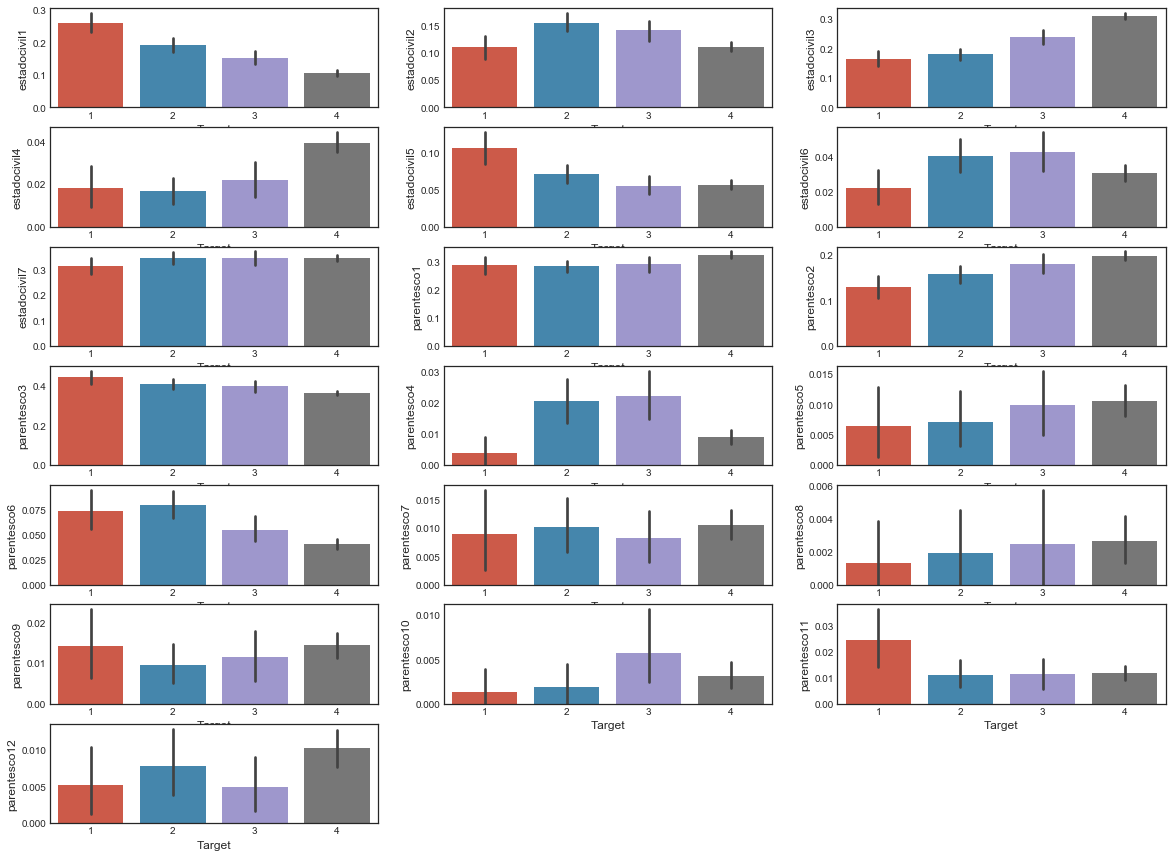

In [39]:
print(train.columns.get_loc("estadocivil1"))

relation = train.iloc[:,75:94]
relation['Target'] = train.Target
display(relation.head())

plt.figure(figsize=(20,15))
size= len(relation.columns)-1
for i in range(0, size):
    plt.subplot(7, 3, i+1)
    sns.barplot(x='Target', y=relation.columns[i], data=relation)

103


,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,Target
0,0,0,0,1,0,0,0,0,0,4
1,0,0,0,0,0,0,0,1,0,4
2,0,0,0,0,1,0,0,0,0,4
3,0,0,0,1,0,0,0,0,0,4
4,0,0,0,0,1,0,0,0,0,4


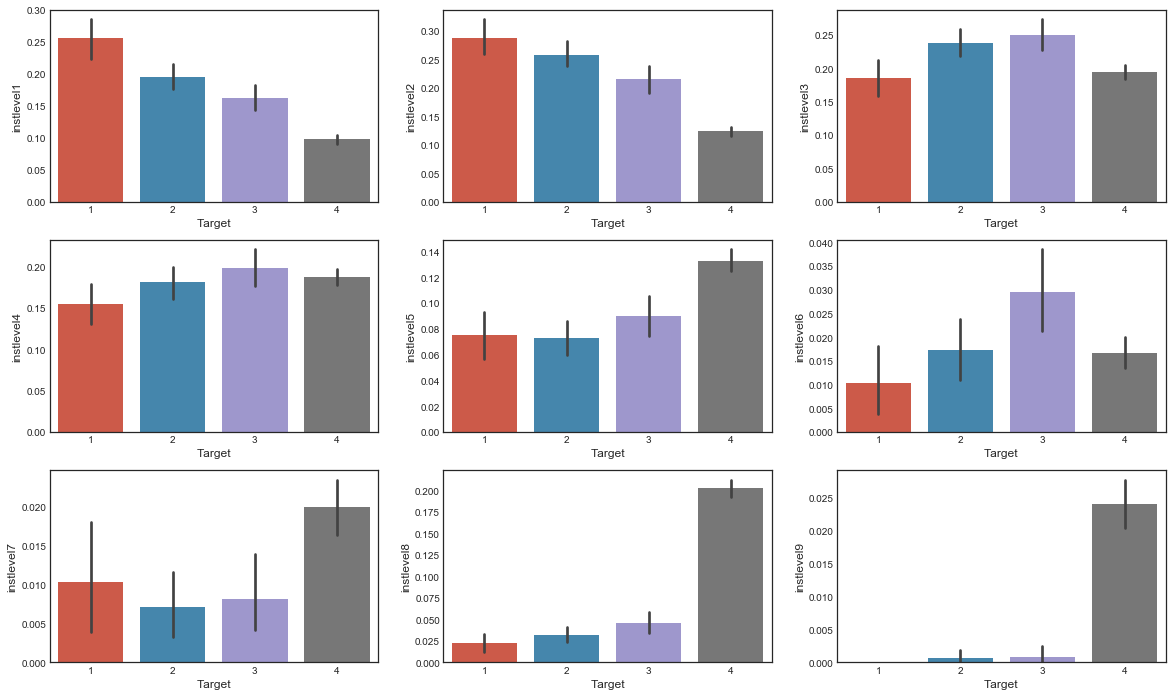

In [40]:
print(train.columns.get_loc("instlevel1"))

education = train.iloc[:,103:112]
education['Target'] = train.Target
display(education.head())

plt.figure(figsize=(20,12))
size= len(education.columns)-1
for i in range(0, size):
    plt.subplot(3, 3, i+1)
    sns.barplot(x='Target' , y=education.columns[i], data=education)

Text(0,0.5,'Assigned/Borrowed')

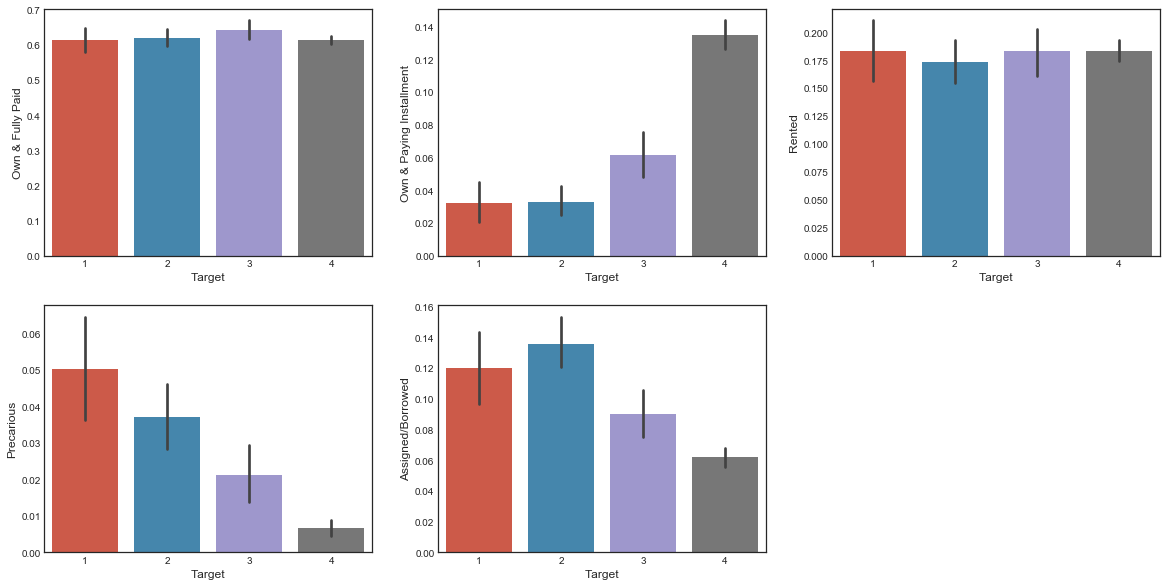

In [41]:
plt.figure(figsize=(20,10)) 
plt.subplot(2, 3, 1)
sns.barplot(x='Target' , y='tipovivi1', data=train)
plt.ylabel("Own & Fully Paid")
plt.subplot(2, 3, 2)
sns.barplot(x='Target' , y='tipovivi2', data=train)
plt.ylabel("Own & Paying Installment")
plt.subplot(2, 3, 3)
sns.barplot(x='Target' , y='tipovivi3', data=train)
plt.ylabel("Rented")
plt.subplot(2, 3, 4)
sns.barplot(x='Target' , y='tipovivi4', data=train)
plt.ylabel("Precarious")
plt.subplot(2, 3, 5)
sns.barplot(x='Target' , y='tipovivi5', data=train)
plt.ylabel("Assigned/Borrowed")

22


,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,Target
0,1,0,0,0,0,0,0,0,4
1,0,0,0,0,1,0,0,0,4
2,0,0,0,0,1,0,0,0,4
3,1,0,0,0,0,0,0,0,4
4,1,0,0,0,0,0,0,0,4


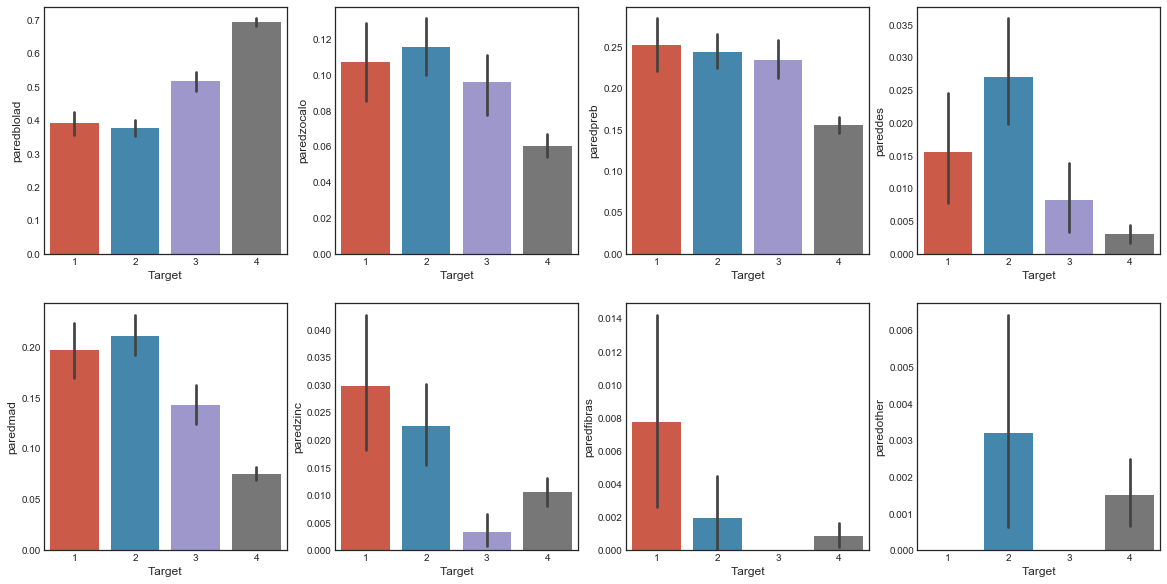

In [42]:
print(train.columns.get_loc("paredblolad"))

outside_wall = train.iloc[:,22:30]
outside_wall['Target'] = train.Target
display(outside_wall.head())

plt.figure(figsize=(20,10))
size= len(outside_wall.columns)-1
for i in range(0, size): 
    plt.subplot(2, 4, i+1)
    sns.barplot(x='Target' , y=outside_wall.columns[i], data=outside_wall)

30


,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,Target
0,1,0,0,0,0,0,4
1,0,0,0,0,0,1,4
2,1,0,0,0,0,0,4
3,1,0,0,0,0,0,4
4,1,0,0,0,0,0,4


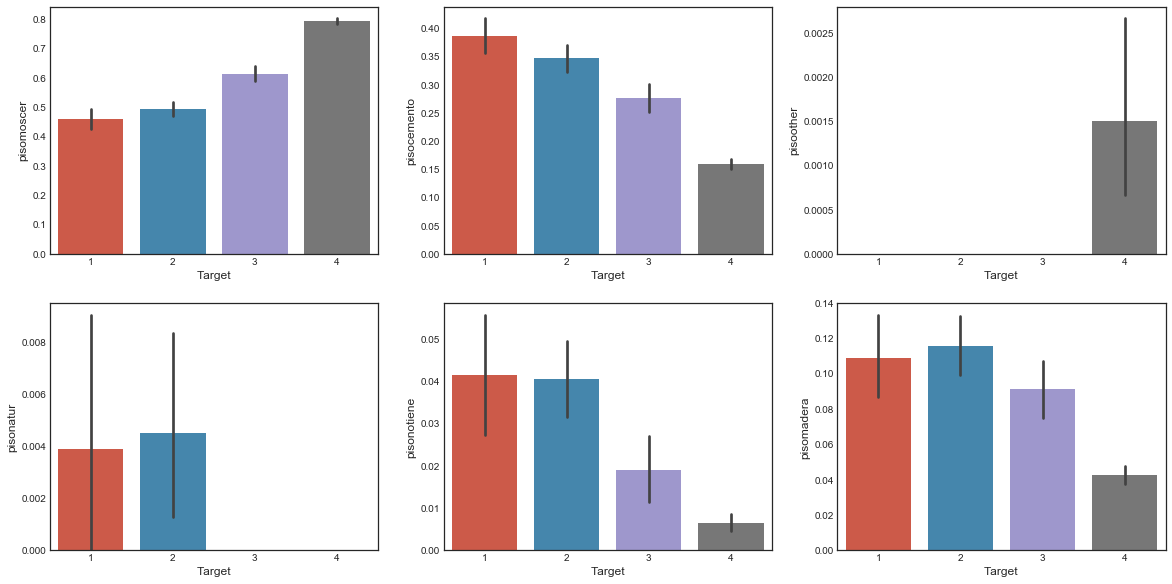

In [43]:
print(train.columns.get_loc("pisomoscer"))

floor = train.iloc[:,30:36]
floor['Target'] = train.Target
display(floor.head())

plt.figure(figsize=(20,10))
size = len(floor.columns)-1
for i in range(0, size):
    plt.subplot(2, 3, i+1)
    sns.barplot(x='Target' , y=floor.columns[i], data=floor)

36


,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,Target
0,1,0,0,0,0,0,4
1,0,0,0,0,0,1,4
2,1,0,0,0,0,0,4
3,1,0,0,0,0,0,4
4,1,0,0,0,0,0,4


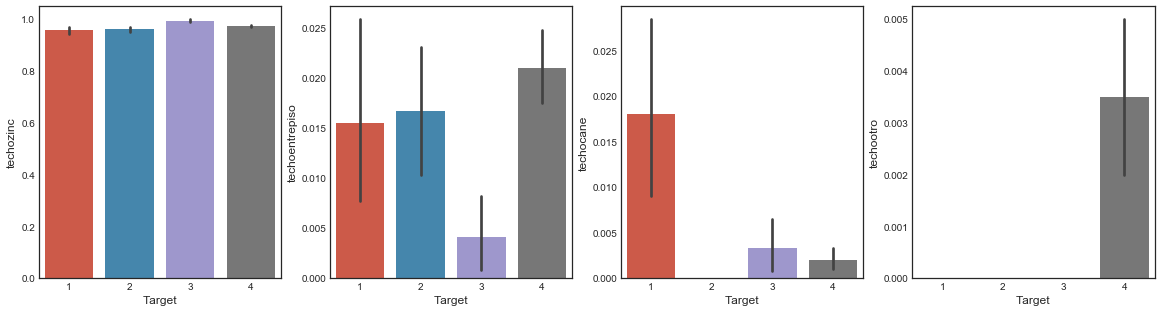

In [44]:
print(train.columns.get_loc("techozinc"))

roof = train.iloc[:,36:40]
roof['Target'] = train.Target
display(floor.head())

plt.figure(figsize=(20,5))
size = len(roof.columns)-1
for i in range(0, size):
    plt.subplot(1, 4, i+1)
    sns.barplot(x='Target' , y=roof.columns[i], data=roof)

Text(0,0.5,'Water Provision Outside Dwelling')

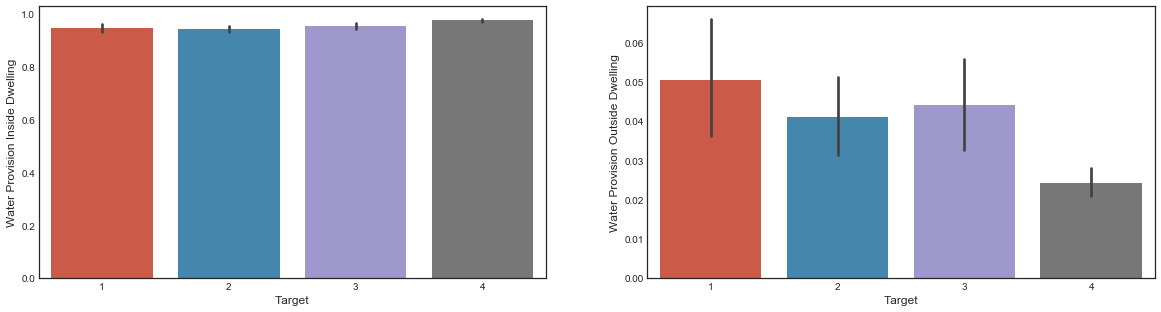

In [45]:
plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.barplot(x='Target' , y='abastaguadentro', data=train)
plt.ylabel("Water Provision Inside Dwelling")
plt.subplot(1, 2, 2)
sns.barplot(x='Target' , y='abastaguafuera', data=train)
plt.ylabel("Water Provision Outside Dwelling")

Text(0,0.5,'Electricity from Cooperative')

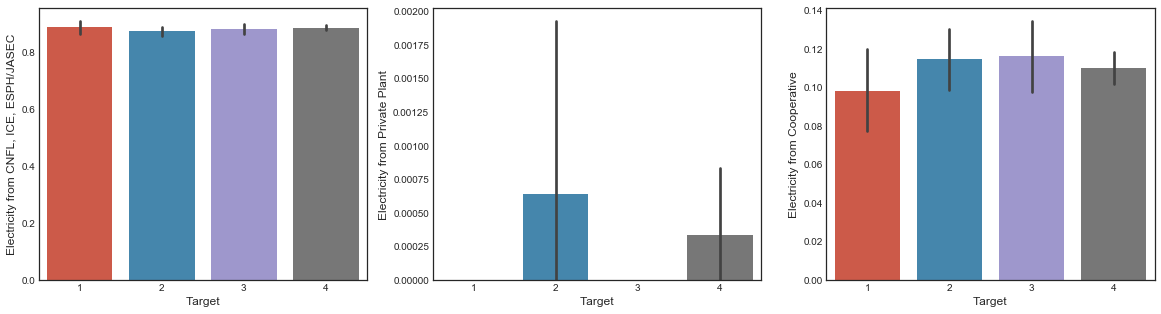

In [46]:
plt.figure(figsize=(20,5)) 
plt.subplot(1, 3, 1)
sns.barplot(x='Target' , y='public', data=train)
plt.ylabel("Electricity from CNFL, ICE, ESPH/JASEC")
plt.subplot(1, 3, 2)
sns.barplot(x='Target' , y='planpri', data=train)
plt.ylabel("Electricity from Private Plant")
plt.subplot(1, 3, 3)
sns.barplot(x='Target' , y='coopele', data=train)
plt.ylabel("Electricity from Cooperative")

Text(0,0.5,'Toilet Connected to Other System')

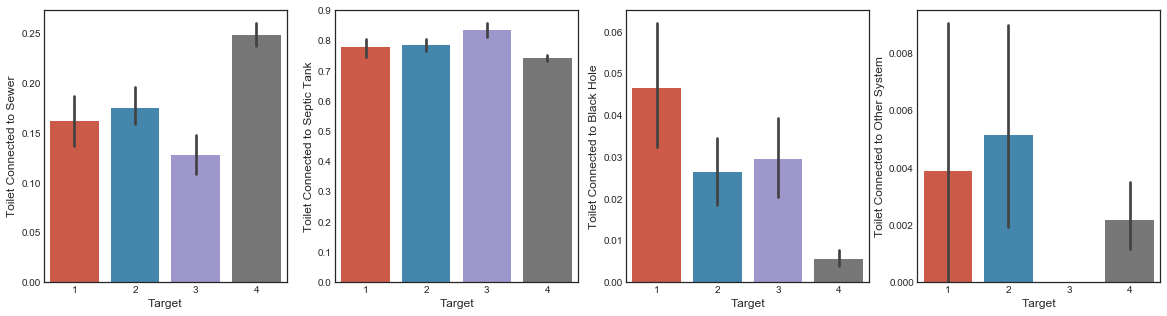

In [47]:
plt.figure(figsize=(20,5)) 
plt.subplot(1, 4, 1)
sns.barplot(x='Target' , y='sanitario2', data=train)
plt.ylabel("Toilet Connected to Sewer")
plt.subplot(1, 4, 2)
sns.barplot(x='Target' , y='sanitario3', data=train)
plt.ylabel("Toilet Connected to Septic Tank")
plt.subplot(1, 4, 3)
sns.barplot(x='Target' , y='sanitario5', data=train)
plt.ylabel("Toilet Connected to Black Hole")
plt.subplot(1, 4, 4)
sns.barplot(x='Target' , y='sanitario6', data=train)
plt.ylabel("Toilet Connected to Other System")

Text(0,0.5,'Cooking Energy - Wood Charcoal')

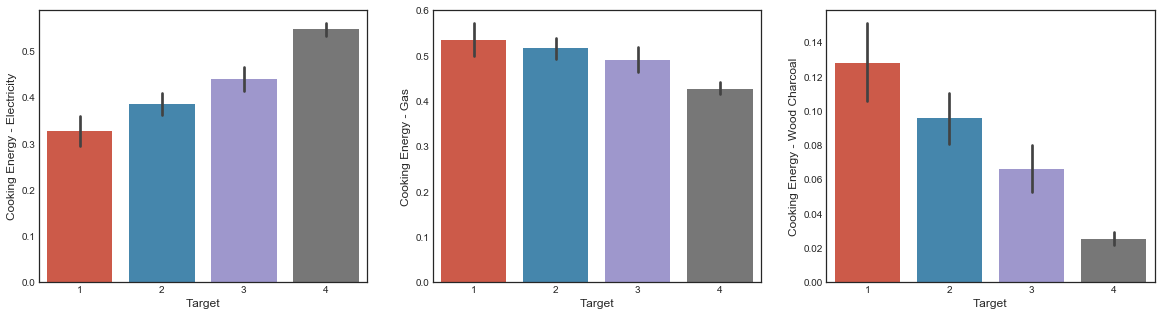

In [48]:
plt.figure(figsize=(20,5)) 
plt.subplot(1, 3, 1)
sns.barplot(x='Target' , y='energcocinar2', data=train)
plt.ylabel("Cooking Energy - Electricity")
plt.subplot(1, 3, 2)
sns.barplot(x='Target' , y='energcocinar3', data=train)
plt.ylabel("Cooking Energy - Gas")
plt.subplot(1, 3, 3)
sns.barplot(x='Target' , y='energcocinar4', data=train)
plt.ylabel("Cooking Energy - Wood Charcoal")

Text(0,0.5,'Rubbish Disposal by Other')

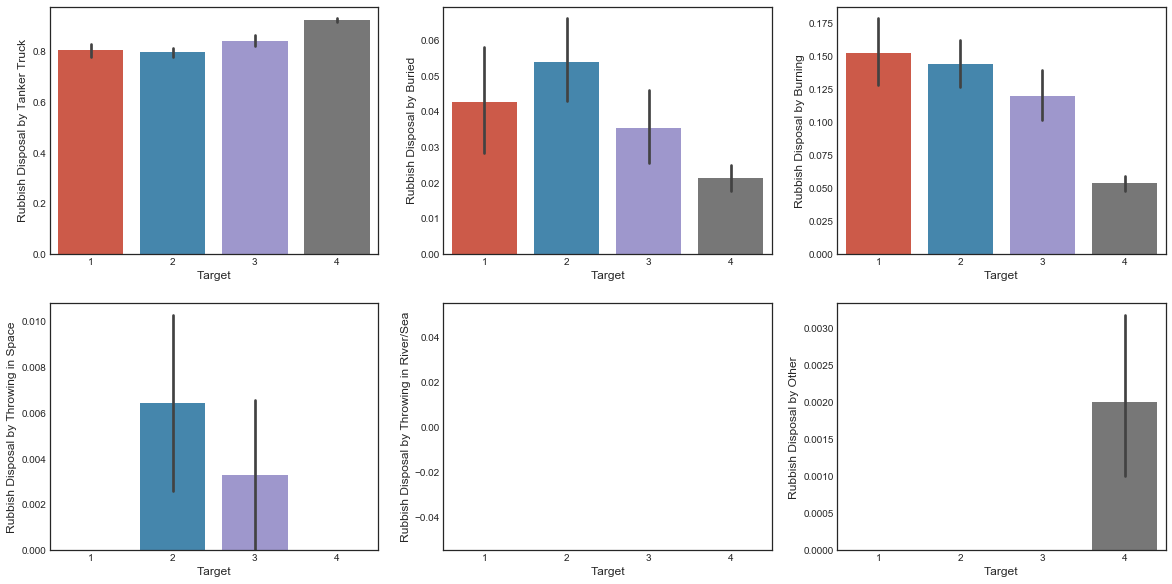

In [49]:
plt.figure(figsize=(20,10)) 
plt.subplot(2, 3, 1)
sns.barplot(x='Target' , y='elimbasu1', data=train)
plt.ylabel("Rubbish Disposal by Tanker Truck")
plt.subplot(2, 3, 2)
sns.barplot(x='Target' , y='elimbasu2', data=train)
plt.ylabel("Rubbish Disposal by Buried")
plt.subplot(2, 3, 3)
sns.barplot(x='Target' , y='elimbasu3', data=train)
plt.ylabel("Rubbish Disposal by Burning")
plt.subplot(2, 3, 4)
sns.barplot(x='Target' , y='elimbasu4', data=train)
plt.ylabel("Rubbish Disposal by Throwing in Space")
plt.subplot(2, 3, 5)
sns.barplot(x='Target' , y='elimbasu5', data=train)
plt.ylabel("Rubbish Disposal by Throwing in River/Sea")
plt.subplot(2, 3, 6)
sns.barplot(x='Target' , y='elimbasu6', data=train)
plt.ylabel("Rubbish Disposal by Other")

Text(0,0.5,'Floor Quality - Good')

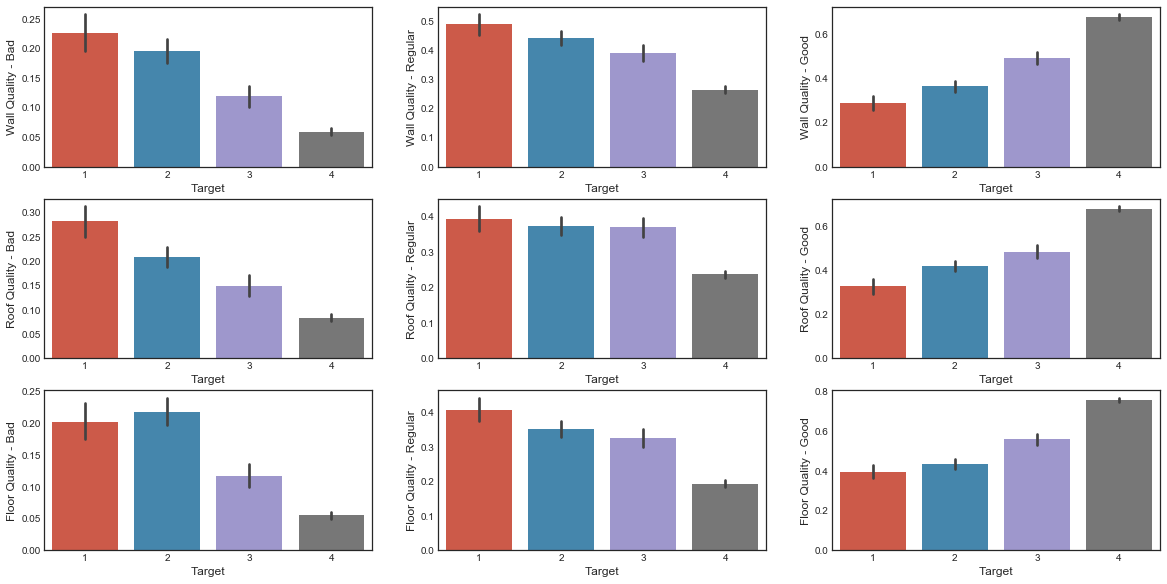

In [50]:
plt.figure(figsize=(20,10)) 
plt.subplot(3, 3, 1)
sns.barplot(x='Target' , y='epared1', data=train)
plt.ylabel("Wall Quality - Bad")
plt.subplot(3, 3, 2)
sns.barplot(x='Target' , y='epared2', data=train)
plt.ylabel("Wall Quality - Regular")
plt.subplot(3, 3, 3)
sns.barplot(x='Target' , y='epared3', data=train)
plt.ylabel("Wall Quality - Good")
plt.subplot(3, 3, 4)
sns.barplot(x='Target' , y='etecho1', data=train)
plt.ylabel("Roof Quality - Bad")
plt.subplot(3, 3, 5)
sns.barplot(x='Target' , y='etecho2', data=train)
plt.ylabel("Roof Quality - Regular")
plt.subplot(3, 3, 6)
sns.barplot(x='Target' , y='etecho3', data=train)
plt.ylabel("Roof Quality - Good")
plt.subplot(3, 3, 7)
sns.barplot(x='Target' , y='eviv1', data=train)
plt.ylabel("Floor Quality - Bad")
plt.subplot(3, 3, 8)
sns.barplot(x='Target' , y='eviv2', data=train)
plt.ylabel("Floor Quality - Regular")
plt.subplot(3, 3, 9)
sns.barplot(x='Target' , y='eviv3', data=train)
plt.ylabel("Floor Quality - Good")

In [51]:
display(train.shape)
display(test.shape)
display(X.shape)
display(y.shape)
display(full.shape)
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.95)]
display(to_drop)

X.drop(to_drop, axis=1, inplace=True)

pred_X = test.drop(to_drop, axis=1)

X = X.drop(['idhogar'],1)
pred_X = pred_X.drop(['idhogar'],1)

display(X.shape)

display(pred_X.shape)

(9557, 142)

(23856, 141)

(9557, 141)

(9557,)

(33413, 142)

['tamhog',
 'hhsize',
 'coopele',
 'female',
 'hogar_total',
 'area2',
 'SQBage',
 'SQBhogar_total',
 'agesq']

(9557, 131)

(23856, 131)

In [52]:
logreg = LogisticRegression()

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X, y)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

pred_Y = logreg_cv.predict(pred_X)
pred = pd.DataFrame({'Id': test_id, 'Target': pred_Y})
print(pred.shape)
print(pred.head())
pred.to_csv('costa_rican_logreg.csv', index = False)

Tuned Logistic Regression Parameters: {'C': 268.2695795279727, 'penalty': 'l2'}
Best score is 0.6537616406822224
(23856, 2)
             Id  Target
0  ID_2f6873615       4
1  ID_1c78846d2       4
2  ID_e5442cf6a       4
3  ID_a8db26a79       4
4  ID_a62966799       4


In [53]:
svc = SVC()

#param_grid = {'kernel': ['rbf', 'poly', 'sigmoid'],
#              'C': [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000],
#              'gamma': [.00001, .0001, .001, .01, .1, 1, 10]}

param_grid = {'C': [10, 100, 1000, 10000],
              'gamma': [.00001, .0001, .001]}

svc_cv = RandomizedSearchCV(svc, param_grid, cv=10)
svc_cv.fit(X, y)

print("Tuned SVM Parameters: {}".format(svc_cv.best_params_)) 
print("Best score is {}".format(svc_cv.best_score_))

pred_Y = svc_cv.predict(pred_X)
pred = pd.DataFrame({'Id': test_id, 'Target': pred_Y})
print(pred.shape)
print(pred.head())
pred.to_csv('costa_rican_svc.csv', index = False)

Tuned SVM Parameters: {'gamma': 1e-05, 'C': 10}
Best score is 0.6295908757978446
(23856, 2)
             Id  Target
0  ID_2f6873615       4
1  ID_1c78846d2       4
2  ID_e5442cf6a       4
3  ID_a8db26a79       4
4  ID_a62966799       2


In [54]:
rfclass = RandomForestClassifier()

param_grid = {"n_estimators": np.arange(5, 100, 5),
              "max_depth": np.arange(1, 50, 5),
              "min_samples_split": np.arange(1,50,1),
              "min_samples_leaf": np.arange(1,50,1),
              "max_leaf_nodes": np.arange(2,50,2)}

rfclass_cv = RandomizedSearchCV(rfclass, param_grid, cv=5)
rfclass_cv.fit(X, y)

print("Tuned Random Forest Parameters: {}".format(rfclass_cv.best_params_)) 
print("Best score is {}".format(rfclass_cv.best_score_))

pred_Y = rfclass_cv.predict(pred_X)
pred = pd.DataFrame({'Id': test_id, 'Target': pred_Y})
print(pred.shape)
print(pred.head())
pred.to_csv('costa_rican_rfclass.csv', index = False)

Tuned Random Forest Parameters: {'n_estimators': 75, 'min_samples_split': 2, 'min_samples_leaf': 40, 'max_leaf_nodes': 16, 'max_depth': 41}
Best score is 0.6458093543999163
(23856, 2)
             Id  Target
0  ID_2f6873615       4
1  ID_1c78846d2       4
2  ID_e5442cf6a       4
3  ID_a8db26a79       4
4  ID_a62966799       4


In [55]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(5, 100, 5),
              'weights': ['uniform', 'distance'],
              'leaf_size': np.arange(5, 100, 5)}

knn_cv = RandomizedSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)

print("Tuned KNN Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

pred_Y = knn_cv.predict(pred_X)
pred = pd.DataFrame({'Id': test_id, 'Target': pred_Y})
print(pred.shape)
print(pred.head())
pred.to_csv('costa_rican_knn.csv', index = False)

Tuned KNN Parameters: {'weights': 'uniform', 'n_neighbors': 55, 'leaf_size': 50}
Best score is 0.6341948310139165
(23856, 2)
             Id  Target
0  ID_2f6873615       4
1  ID_1c78846d2       4
2  ID_e5442cf6a       4
3  ID_a8db26a79       4
4  ID_a62966799       4
